Q1: Read the file named “PCA_disk.py”. Finish your work based on it. Overwrite the original file and save your work there.
Perform PCA: Implement the PCA process using the steps below (50 points in total):
• De-mean the dataset by subtracting the mean from each dimension. (10 points)
• Compute the covariance matrix of the mean-centered data. (20 points)
• Calculate the eigenvalues and eigenvectors of the covariance matrix, then sort them in descending order. (20 points)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set a seed for reproducibility
np.random.seed(42)

# Parameters for the disk shape
n_samples = 1000
theta = np.linspace(0, 2 * np.pi, n_samples)

# Create disk data
radii = np.sqrt(np.random.rand(n_samples))  # Radii
x = radii * np.cos(theta)  # X coordinates
y = radii * np.sin(theta)  # Y coordinates
z = 0.1 * np.random.randn(n_samples)  # Limited depth (Z coordinate)

data = np.column_stack([x,y,z])

# Perform PCA
# De-mean the dataset by subtracting the mean from each dimension.
mean_centered_data = data - np.mean(data, axis=0)

# Compute the covariance matrix of the mean-centered data.
covariance_matrix = np.cov(mean_centered_data, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix, then sort them in descending order.
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Print results
print("Covariance Matrix:")
print(covariance_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Covariance Matrix:
[[ 0.24451953 -0.00169211  0.00158477]
 [-0.00169211  0.24617693  0.00025856]
 [ 0.00158477  0.00025856  0.00977989]]

Eigenvalues:
[0.24723399 0.24347347 0.00976888]

Eigenvectors:
[[ 0.53010107 -0.84790752 -0.00675893]
 [-0.84793043 -0.53010629 -0.00114204]
 [ 0.0026146  -0.0063365   0.99997651]]


Q2: Variance Analysis (20 points) Determine and print the explained variance ratio for each principal component. Based on the how the first two principal component explain the variability in the data, would you say the data spreads out like a basketball or a disk?

In [34]:
# Calculate the variance explained by each principal component
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Print results
print("Explained Variance Ratio")
for i, r in enumerate(explained_variance_ratio, start=1):
    print(f"  PC{i}: {r:.8f}\n")



Explained Variance Ratio
  PC1: 0.49399736

  PC2: 0.48648348

  PC3: 0.01951916



The first two components comprise approximately 98% of all the variance in the data. Which means most of the variance is in two directions, not three. This would make our data spread look more like a disk instead of a ball

Q3: Data Projection and Table Creation (20 points) Project the mean-centered 3D data onto the first two principal components derived from PCA. Create a Pandas DataFrame to display the original data alongside their projections onto these two principal components. Print the first 5 rows of this DataFrame to verify the results.

   Original X  Original Y  Original Z  Projected PC1  Projected PC2
0    0.611997    0.000000    0.017770       0.330924      -0.521928
1    0.975027    0.006132   -0.133534       0.517771      -0.832035
2    0.855499    0.010762    0.038020       0.450932      -0.734228
3    0.773593    0.014598    0.061059       0.404321      -0.666959
4    0.394867    0.009936    0.055979       0.207498      -0.343331


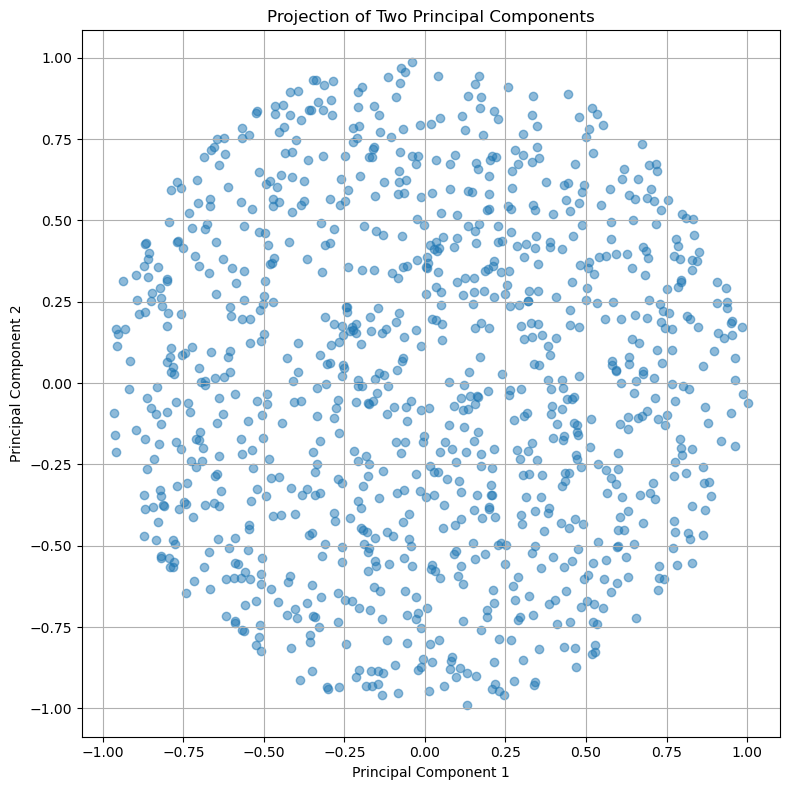

In [35]:
projected_data = np.dot(mean_centered_data, eigenvectors[:, :2])

# Create a DataFrame for the table
table_data = pd.DataFrame(data, columns=['Original X', 'Original Y','Original Z'])
table_data['Projected PC1'] = projected_data[:, 0]
table_data['Projected PC2'] = projected_data[:, 1]

# Display the table
print(table_data.head(5))

# Plot the data and principal components
plt.figure(figsize=(8, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)
plt.title("Projection of Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Q4: Visualization (10 points) Create a scatter plot of the projected data points based on the first two principal components obtained from PCA. Ensure that the plot clearly represents how the principal components relate to the projected data.

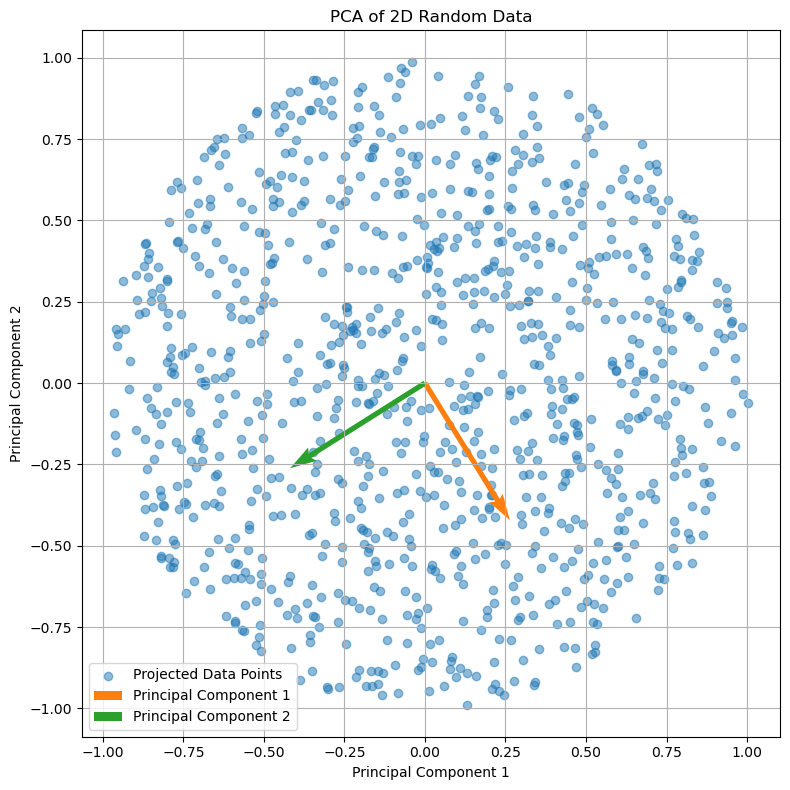

In [36]:
# Plot the data and principal components
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5, label='Projected Data Points')

# Plot principal components scaled by the square root of their eigenvalues
mean = np.zeros(2)

for i in range(2):
    eigenvalue_scaled_component = np.sqrt(eigenvalues[i]) * eigenvectors[:, i][:2]
    ax.quiver(mean[0], mean[1], eigenvalue_scaled_component[0], eigenvalue_scaled_component[1],
              color=f'C{i + 1}', angles='xy', scale_units='xy', scale=1, label=f'Principal Component {i + 1}')


ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title('PCA of 2D Random Data')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()